# Ритейл — Оценка эффективности торговых точек

### Описание проекта:

Оценка эффективности магазинов сети по продаже строительных материалов:

- проведение исследовательского анализа данных;
- оценка эффективности торговых точек;
- формулирование и проверка статистических гипотез.

### План проекта**:**

[1. Загрузка данных, ознакомление с данными и подготовка их к анализу.](#1)
      
[1.1. Загрузка данных о товарах.](#11)      
[1.2. Загрузка данных о продажах.](#12)     
[1.3. Изменение названий столбцов.](#13)  
[1.4. Изменение типов данных.](#14)
[1.5. Проверка пропусков в данных.](#15)     
[1.6. Проверка на наличие дубликатов.](#16)

[2. Исследовательский анализ данных.](#2)   

[2.1. Определение аномальных товаров.](#21)  
[2.2. Определение стоимости единицы товара. Построение гистограмм цен. Выбор средней стоимости единицы товара.](#22)    
[2.3. Объединение  данных о товарах и продажах.](#23)       
[2.4. Расчет выручки.](#24)       
[2.5. Расчет количества сделок и выручки для каждого магазина.](#25)      
[2.6. Определение лучших магазинов по количеству сделок и общей выручке. Разделение магазинов по категориям.](#26)       
[2.7. Анализ распределения количества сделок и выручки по дням. Построение графика.](#27)      
[2.8. Анализ распределения уникальных покупателей по магазинам.](#28)         
[2.9. Анализ распределения количества сделок и выручки по уникальным покупателям.](#29)      
[2.10. Определение средней выручки от одного клиента. Определение средней выручки от одного клиента для каждой категории магазинов.](#210)      
[2.11. Анализ активности клиентов, участвующих в программе лояльности..](#211)     
[2.12. Определение средней выручки от клиентов, участвующих и не участвующих в программе лояльности.](#212)    
[2.13. Анализ количества проданного товара по каждой товарной позиции. Анализ количества возвращенного товара.](#213)    
[2.14. Анализ количества возвратов товара по категориям магазинов.](#214)

[3. Проверка статистических гипотез.](#3)    

[3.1. Проверка гипотезы о равенстве ежедневного среднего чека для каждой категории магазинов.](#31)      
[3.2. Проверка гипотезы об отсутствии влияния на среднюю выручку магазина наличия/отсутствия товаров в ассортименте.](#32)     
[3.3. Проверка гипотезы о равенстве долей возврата товара для каждой категории категории магазинов.](#33)       

[4. Вывод.](#4)    

[5. Презентация результатов анализа.](#5)

[6. Создание дашборда в Tableau. Размещение дашборда на сайте Tableau Public.](#6)

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from scipy import stats as st
import math as mth

## <a name=1> 1. Загрузка данных, ознакомление с данными и подготовка их к анализу.</a>

### <a name=11> 1.1. Загрузка данных о товарах.</a>

In [2]:
product = pd.read_csv('https://code.s3.yandex.net/datasets/product_codes.csv')

In [3]:
product.head()

,productID,price_per_one
0,85123A,2.55
1,71053,3.39
2,84406B,2.75
3,84029G,3.39
4,84029E,3.39


In [4]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9969 entries, 0 to 9968
Data columns (total 2 columns):
productID        9969 non-null object
price_per_one    9969 non-null float64
dtypes: float64(1), object(1)
memory usage: 155.9+ KB


In [5]:
product.describe()

,price_per_one
count,9969.000000
mean,19.503697
std,330.880754
min,0.000000
25%,1.250000
50%,2.550000
75%,5.510000
max,16888.020000


In [6]:
product.nunique()

productID        3159
price_per_one     586
dtype: int64

### <a name=12> 1.2. Загрузка данных о продажах.</a>

In [7]:
purchase = pd.read_csv('https://code.s3.yandex.net/datasets/retail_dataset.csv')

In [8]:
purchase.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,ShopID,loyalty_program
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0


In [9]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null object
CustomerID         69125 non-null float64
ShopID             105335 non-null object
loyalty_program    105335 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ MB


In [10]:
purchase.describe()

,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


In [11]:
purchase.nunique()

purchaseid         4894
item_ID            3159
Quantity            301
purchasedate       4430
CustomerID         1749
ShopID               31
loyalty_program       2
dtype: int64

### <a name=13> 1.3. Изменение названий столбцов.</a>

In [12]:
product.columns = ['item_id', 'price_per_one']

In [13]:
purchase.columns = ['purchase_id','item_id', 'quantity', 'purchase_dt', 'customer_id', 'shop_id', 'loyalty_program']

### <a name=14> 1.4. Изменение типов данных.</a>

In [14]:
purchase['purchase_dt'] = pd.to_datetime(purchase['purchase_dt'], format='%Y-%m-%d %H:%M:%S')

### <a name=15> 1.5. Проверка пропусков в данных.</a>

In [15]:
product.isna().sum()

item_id          0
price_per_one    0
dtype: int64

In [16]:
purchase.isna().sum()

purchase_id            0
item_id                0
quantity               0
purchase_dt            0
customer_id        36210
shop_id                0
loyalty_program        0
dtype: int64

### <a name=16> 1.6. Проверка на наличие дубликатов.</a>

In [17]:
product.duplicated().sum()

0

In [18]:
purchase.duplicated().sum()

1033

В данных имеются дубликаты в количестве 1033 строк. Удалим дубликаты.

In [19]:
purchase.drop_duplicates(keep='first', inplace=True)

## <a name=2> 2. Исследовательский анализ данных.</a>

### <a name=21> 2.1. Определение аномальных товаров.</a>

Для пределения выбросов в ценах на товары построим точечный график.

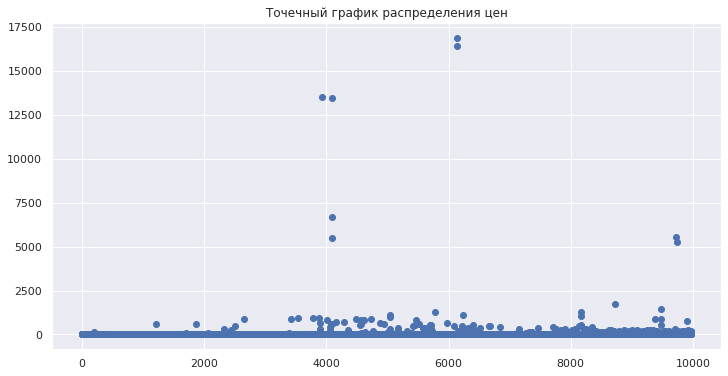

In [20]:
sns.set(rc={'figure.figsize':(12,6)})
x_values = pd.Series(range(0,len(product['price_per_one'])))
plt.title('Точечный график распределения цен')
plt.scatter(x_values,product['price_per_one']);

Чтобы установить аномальные цены расчитаем 95-й и 99-й перцентили распределения цен.  

In [21]:
np.percentile(product['price_per_one'], [95, 99])

array([ 16.98  , 226.6324])

Определим товары с аномальными ценами.

In [22]:
products_abnorm = product.query('price_per_one > 227').groupby('item_id').min().reset_index()['item_id']

In [23]:
products_abnorm

0           22655
1       AMAZONFEE
2    BANK CHARGES
3               D
4             DOT
5               M
Name: item_id, dtype: object

Посмотрим на магазины, в которых продавались товары с аномальными ценами

In [24]:
purchase.query('item_id in @products_abnorm').groupby(by='shop_id').count()

,purchase_id,item_id,quantity,purchase_dt,customer_id,loyalty_program
shop_id,,,,,,
Shop 0,306,306,306,306,95,306
Shop 11,1,1,1,1,1,1
Shop 18,4,4,4,4,4,4
Shop 26,1,1,1,1,1,1
Shop 8,2,2,2,2,2,2


Подавляющее количество продаж цен с аномальными товарами пришлось на магазин 'Shop 0'.

Посчитаем количество проданного товара с аномальным ценами.

In [25]:
purchase.query('item_id in @products_abnorm')[['quantity','item_id']].groupby(by='item_id').count().sort_values(by='quantity')

,quantity
item_id,
BANK CHARGES,9
AMAZONFEE,11
D,12
22655,22
M,85
DOT,175


Для исключения влияния продаж товаров с аномальными ценами на анализ эффективности магазинов, очистим таблицы от данных об аномальных товарах.   

In [26]:
product_clear = product.query('item_id not in @products_abnorm')

In [27]:
purchase_clear = purchase.query('item_id not in @products_abnorm')

### <a name=22>2.2. Определение стоимости единицы товара. Выбор средней стоимости единицы товара. </a>

Посчитаем количество различных цен на каждый уникальный товар.

In [28]:
num_price = product_clear.groupby(by='item_id')['price_per_one'].count().sort_values(ascending=False).reset_index()

Построим гистограмму количества цен на каждый товар.

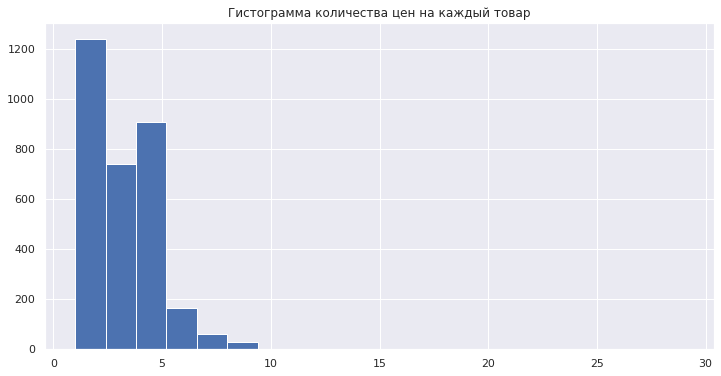

In [29]:
plt.hist(num_price['price_per_one'], bins=20)
plt.title('Гистограмма количества цен на каждый товар');

Построим боксплоты для пяти товаров с наибольшим количеством цен.

In [30]:
num_price.query('price_per_one >9').head()

,item_id,price_per_one
0,S,29
1,POST,15
2,79321,11
3,84406B,10
4,47566,10


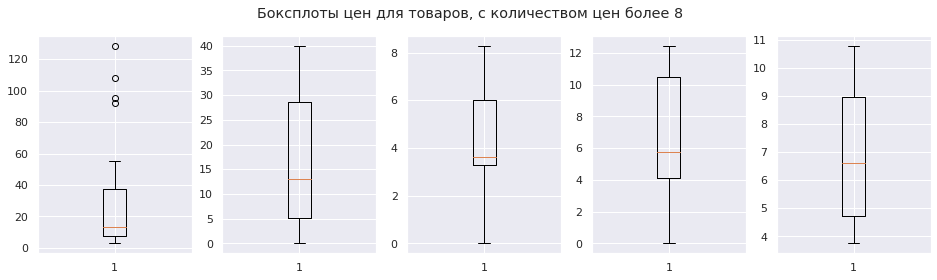

In [31]:
fig, axs = plt.subplots(1, 5, figsize=(16, 4))
plt.suptitle('Боксплоты цен для товаров, с количеством цен более 8')
axs[0].boxplot(product.query('item_id == "S"')['price_per_one'])
axs[1].boxplot(product.query('item_id == "POST"')['price_per_one'])
axs[2].boxplot(product.query('item_id == "84406B"')['price_per_one'])
axs[3].boxplot(product.query('item_id == "79321"')['price_per_one'])
axs[4].boxplot(product.query('item_id == "47566"')['price_per_one']);

Так как на графиках виден большой разброс цен, возьмем в качестве средней цены для каждого товара его медианную цену. 

In [32]:
price_med = product_clear.groupby(by='item_id').median().reset_index()
price_med.columns = ['item_id', 'price_med']
price_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3153 entries, 0 to 3152
Data columns (total 2 columns):
item_id      3153 non-null object
price_med    3153 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.4+ KB


### <a name=23>2.3. Объединение  данных о товарах и продажах.</a>

Объединим таблицу с данными о продажах purchase_clear и таблицу с медианными ценами на товары price_med по уникальному идентификатору товара 'item_id'.

In [33]:
data = purchase_clear.merge(price_med, on='item_id', how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103988 entries, 0 to 103987
Data columns (total 8 columns):
purchase_id        103988 non-null object
item_id            103988 non-null object
quantity           103988 non-null int64
purchase_dt        103988 non-null datetime64[ns]
customer_id        68051 non-null float64
shop_id            103988 non-null object
loyalty_program    103988 non-null float64
price_med          103988 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 7.1+ MB


### <a name=24>2.4. Расчет выручки.</a>

Расчитаем выручку по каждой продаже.

In [34]:
data['revenue'] = data['quantity'] * data['price_med']

In [35]:
data.head()

,purchase_id,item_id,quantity,purchase_dt,customer_id,shop_id,loyalty_program,price_med,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.63,17.93
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0,3.29,0.00
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0,1.63,11.41
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0,4.37,0.00
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0,5.75,0.00


### <a name=25>2.5. Расчет количества сделок и выручки для каждого магазина.</a>

Расчитаем количество продаж и выручку для каждого магазина. 

In [36]:
shops = (data.pivot_table(index='shop_id', 
        aggfunc={'revenue':'sum', 'purchase_id':'count'}).reset_index().sort_values(by='purchase_id', ascending=False))
shops.columns = ['shop_id','purchase_cnt', 'revenue_total'] 
shops.head()

,shop_id,purchase_cnt,revenue_total
0,Shop 0,96064,1742985.395
25,Shop 4,1739,50533.035
1,Shop 1,1540,48030.905
27,Shop 6,1030,55877.765
29,Shop 8,558,17022.025


### <a name=26>2.6. Определение лучших магазинов по количеству сделок и общей выручке. Разделение магазинов по категориям.</a>

Отсортируем данные о продажах и выручке для каждого магазина по количеству сделок.

In [37]:
shops.sort_values(by='purchase_cnt', ascending=False).head()

,shop_id,purchase_cnt,revenue_total
0,Shop 0,96064,1742985.395
25,Shop 4,1739,50533.035
1,Shop 1,1540,48030.905
27,Shop 6,1030,55877.765
29,Shop 8,558,17022.025


Отсортируем данные о продажах и выручке для каждого магазина по выручке.

In [38]:
shops.sort_values(by='revenue_total', ascending=False).head()

,shop_id,purchase_cnt,revenue_total
0,Shop 0,96064,1742985.395
23,Shop 3,492,101963.465
27,Shop 6,1030,55877.765
25,Shop 4,1739,50533.035
1,Shop 1,1540,48030.905


Построим график количества сделок для каждого магазина, за исключением магазина 'Shop 0'.

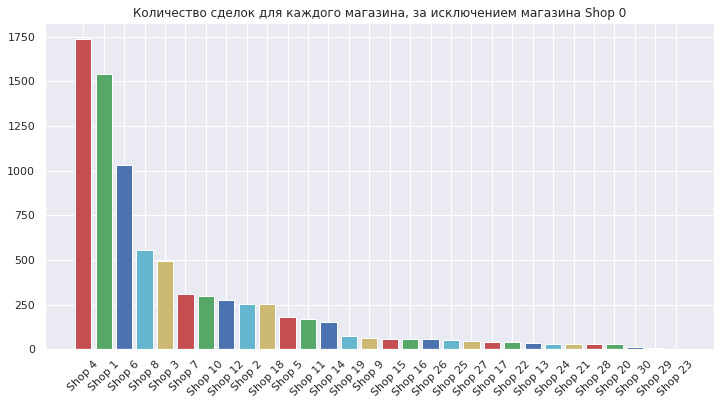

In [39]:
plt.bar(shops.query('shop_id != "Shop 0"')['shop_id']
        , shops.query('shop_id != "Shop 0"')['purchase_cnt']
        ,color=['r','g','b','c','y'])
plt.xticks(rotation=45)
plt.title('Количество сделок для каждого магазина, за исключением магазина Shop 0');
#plt.savefig('Количество сделок', dpi=300, bbox_inches='tight');

Построим график выручки для каждого магазина, за исключением магазина 'Shop 0'.

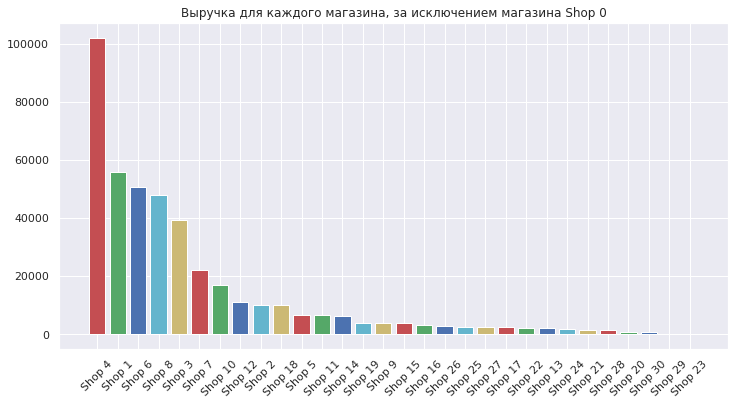

In [40]:
plt.bar(shops.query('shop_id != "Shop 0"')['shop_id']
        , shops.query('shop_id != "Shop 0"')['revenue_total'].sort_values(ascending=False)
        ,color=['r','g','b','c','y'])
plt.xticks(rotation=45)
plt.title('Выручка для каждого магазина, за исключением магазина Shop 0');
#plt.savefig('Выручка для каждого магазина', dpi=300, bbox_inches='tight');

Магазин 'Shop 0' является безоговорочным лидером по количеству продаж и выручке, его результатаы на порядок выше, чем у ближайших преследователей. Среди остальных магазинов явные лидеры по количеству продаж и выручке - магазины  'Shop 1', 'Shop 4' и 'Shop 6'. 

Выберем в качестве критерия разделения магазинов на категории - количество продаж. Расчитаем общее количество продаж для магазинов с количеством продаж менее 600 и для магазинов с количеством продаж более 600.

In [41]:
shops.query('purchase_cnt < 600')['purchase_cnt'].sum()

3615

In [42]:
shops.query('2000 > purchase_cnt > 600')['purchase_cnt'].sum()

4309

Разобьем торговые точки на три категории исходя из общего количества сделок. Судя по огромному разрыву в общей выручке и количеству сделок между магазином 'Shop 0' и другими точками, 'Shop 0' является интернет-магазином или гипермаркетом, значительно опережающим по ресурсам остальные точки. Выделим 'Shop 0' в первую категорию. Ко второй категории отнесем лидеров оставшейся части магазинов - 'Shop 1', 'Shop 4' и 'Shop 6'. Суммарное количество сделок магазинов второй категории - 3615. К третьей категории отнесем все остальные торговые точки. Суммарное количество сделок магазинов третьей категории - 4309. Создадим списки магазинов категории 2 и 3.   

In [43]:
shoplist_2 = shops.query('2000 > purchase_cnt > 600')['shop_id']

In [44]:
shoplist_3 = shops.query('purchase_cnt < 600')['shop_id']

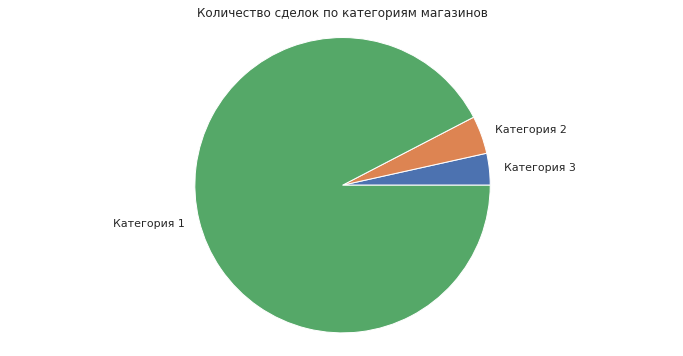

In [45]:
vals = [3615, 4309, 96064]
labels = ['Категория 3', 'Категория 2', 'Категория 1']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.set_title('Количество сделок по категориям магазинов')
ax.axis('equal');
#fig.savefig('Круговая количество сделок', dpi=300, bbox_inches='tight');

### <a name=27>2.7. Анализ распределения количества сделок и выручки по дням. Построение графика.</a>

Для анализа продаж по дням выделим из purchase_dt дату без указания времени.

In [46]:
data['purchase_date'] = data['purchase_dt'].dt.date
data.head()

,purchase_id,item_id,quantity,purchase_dt,customer_id,shop_id,loyalty_program,price_med,revenue,purchase_date
0,538280,21873,11,2016-12-10 12:50:00,18427.0,Shop 0,0.0,1.63,17.93,2016-12-10
1,538862,22195,0,2016-12-14 14:11:00,22389.0,Shop 0,1.0,3.29,0.00,2016-12-14
2,538855,21239,7,2016-12-14 13:50:00,22182.0,Shop 0,1.0,1.63,11.41,2016-12-14
3,543543,22271,0,2017-02-09 15:33:00,23522.0,Shop 0,1.0,4.37,0.00,2017-02-09
4,543812,79321,0,2017-02-13 14:40:00,23151.0,Shop 0,1.0,5.75,0.00,2017-02-13


Посчитаем количество продаж и выручку на каждую дату.

In [47]:
dates = (data.pivot_table(index='purchase_date', 
        aggfunc={'revenue':'sum', 'purchase_id':'count'}).
        sort_values(by='purchase_date')).reset_index()
dates.columns = ['purchase_date', 'purchase_cnt','revenue_total']
dates['purchase_date'] = pd.to_datetime(dates['purchase_date'])
dates.head()

,purchase_date,purchase_cnt,revenue_total
0,2016-12-01,3059,68771.810
1,2016-12-02,2066,29470.515
2,2016-12-03,2178,39325.500
3,2016-12-05,2612,35720.470
4,2016-12-06,3823,45987.125


Построим совместный график для количества продаж и выручки на каждую дату анализируемого периода. 

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



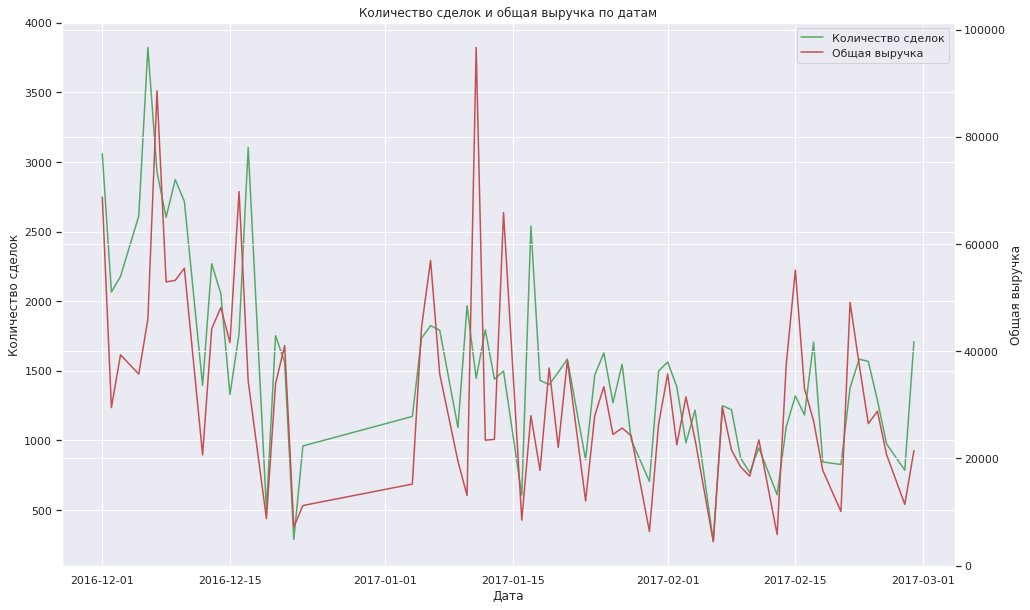

In [48]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
line1, = ax1.plot(dates['purchase_date'], dates['purchase_cnt'], 'g')
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество сделок')
ax2 = ax1.twinx()
line2, = ax2.plot(dates['purchase_date'], dates['revenue_total'],'r')
ax2.set_ylabel('Общая выручка')
plt.title('Количество сделок и общая выручка по датам')
plt.legend((line1, line2), ('Количество сделок', 'Общая выручка'))
plt.show()

Построим графики изменения количества сделок, выручки и среднего чека по датам для каждой категории торговых точек.

In [49]:
cat_1= (data.query('shop_id == "Shop 0"')
        .pivot_table(index='purchase_date',aggfunc={'revenue':'sum', 'purchase_id':'count'})
        .sort_values(by='purchase_date').reset_index())
cat_1['cheque'] = cat_1['revenue'] / cat_1['purchase_id']
cat_2= (data.query('shop_id in @shoplist_2')
        .pivot_table(index='purchase_date',aggfunc={'revenue':'sum', 'purchase_id':'count'})
        .sort_values(by='purchase_date').reset_index())
cat_2['cheque'] = cat_2['revenue'] / cat_2['purchase_id']
cat_3= (data.query('shop_id in @shoplist_3')
        .pivot_table(index='purchase_date',aggfunc={'revenue':'sum', 'purchase_id':'count'})
        .sort_values(by='purchase_date').reset_index())
cat_3['cheque'] = cat_3['revenue'] / cat_3['purchase_id']

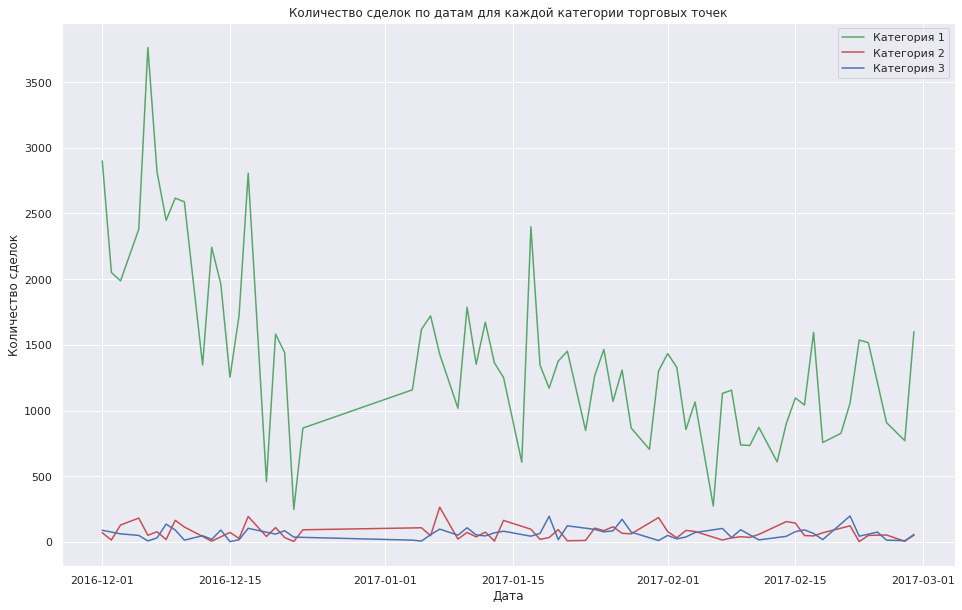

In [50]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
line1, = (ax1.plot(cat_1['purchase_date'], cat_1['purchase_id'], 'g'))
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество сделок')
line2, = ax1.plot(cat_2['purchase_date'], cat_2['purchase_id'],'r')
line3, = ax1.plot(cat_3['purchase_date'], cat_3['purchase_id'],'b')
plt.title('Количество сделок по датам для каждой категории торговых точек')
plt.legend((line1, line2, line3), ('Категория 1', 'Категория 2', 'Категория 3'))
plt.show()

Построим графики изменения выручки по датам для каждой категории торговых точек.

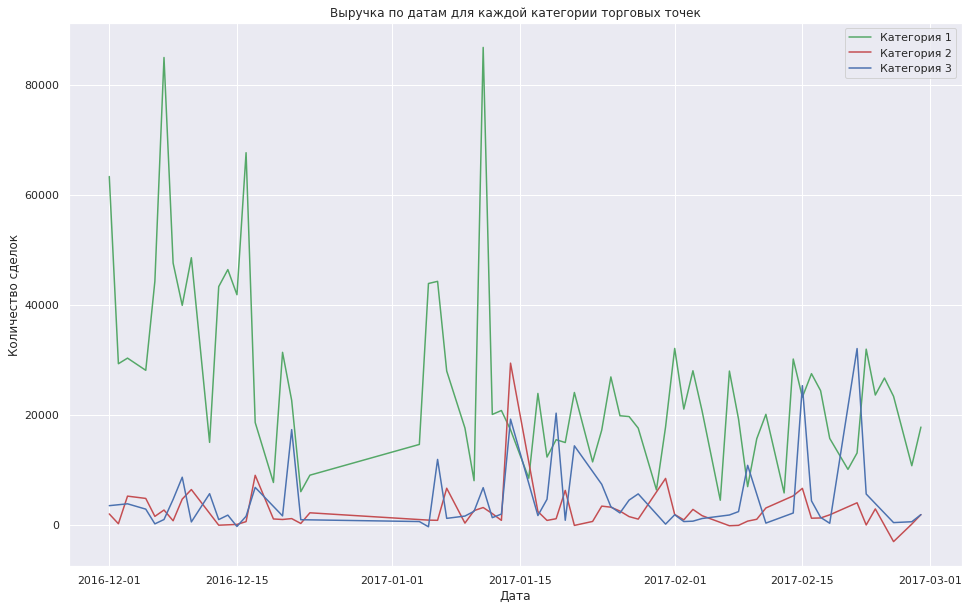

In [51]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
line1, = (ax1.plot(cat_1['purchase_date'], cat_1['revenue'], 'g'))
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество сделок')
line2, = ax1.plot(cat_2['purchase_date'], cat_2['revenue'],'r')
line3, = ax1.plot(cat_3['purchase_date'], cat_3['revenue'],'b')
plt.title('Выручка по датам для каждой категории торговых точек')
plt.legend((line1, line2, line3), ('Категория 1', 'Категория 2', 'Категория 3'))
plt.show()

Построим графики изменения среднего чека по датам для каждой категории торговых точек.

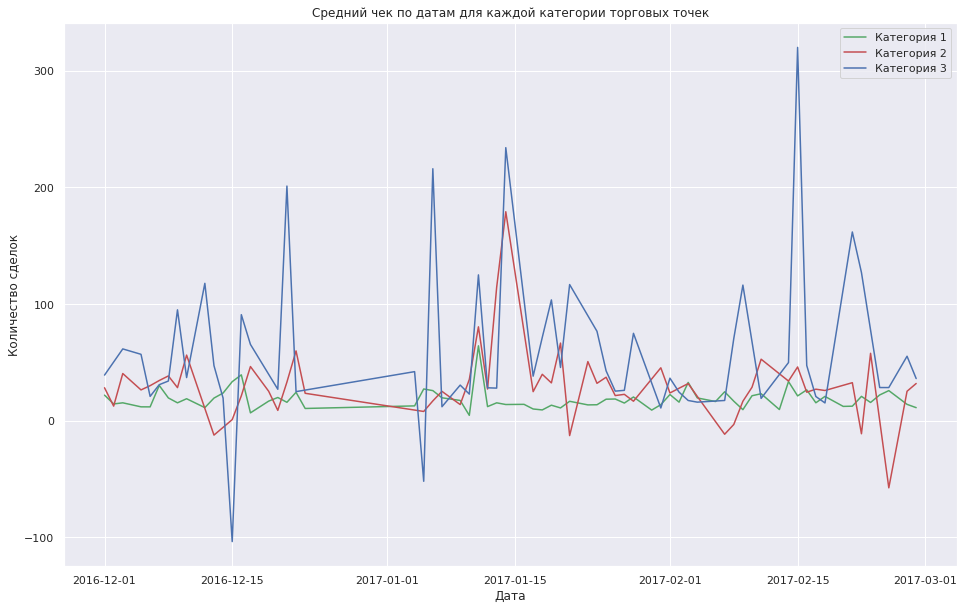

In [52]:
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(111)
line1, = (ax1.plot(cat_1['purchase_date'], cat_1['cheque'], 'g'))
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество сделок')
line2, = ax1.plot(cat_2['purchase_date'], cat_2['cheque'],'r')
line3, = ax1.plot(cat_3['purchase_date'], cat_3['cheque'],'b')
plt.title('Средний чек по датам для каждой категории торговых точек')
plt.legend((line1, line2, line3), ('Категория 1', 'Категория 2', 'Категория 3'))
plt.show()

По виду приведенных графиков можно сделать следующие выводы.     
Количество продаж магазинов категории 1 на каждую дату значительно превышает количество продаж магазинов категорий 2 и 3.    
Выручка магазинов категории 1 в целом выше, чем у магазинов категорий 2 и 3, однако, в середине января и февраля наблюдаются периоды, когда выручка магазинов всех 3 категорий находится на одном уровне.     
Лидером по среднему чеку являются магазины категории 3.    
Для большей наглядности расчитаем средний чек для каждой категории за весь анализируемый период.

In [53]:
avg_cheque_1 = cat_1['revenue'].sum() / cat_1['purchase_id'].sum()
avg_cheque_1

18.144001863341103

In [54]:
avg_cheque_2 = cat_2['revenue'].sum() / cat_2['purchase_id'].sum()
avg_cheque_2

35.84165815734509

In [55]:
avg_cheque_3 = cat_3['revenue'].sum() / cat_3['purchase_id'].sum()
avg_cheque_3

74.13776901798063

Самый высокий средний чек у магазинов категории 3, самый низкий - у категории 1.

### <a name=28>2.8. Анализ распределения уникальных покупателей по магазинам.</a>

Посмотрим как распределились уникальные покупатели по магазинам.

In [56]:
clients = (data.pivot_table(index='shop_id',  
        aggfunc={'customer_id':'nunique'}).
        sort_values(by='customer_id', ascending=False)).reset_index()
clients.head()

,shop_id,customer_id
0,Shop 0,1568
1,Shop 4,43
2,Shop 1,38
3,Shop 8,11
4,Shop 12,10


Ожидаемо подавляющее большинство покупателей обслуживаются в магазине 'Shop 0'.

### <a name=29>2.9. Анализ распределения количества сделок и выручки по уникальным покупателям.</a>

Определим лидеров по выручке среди покупателей.

In [57]:
clients_val_revenue = (data.pivot_table(index='customer_id', 
        aggfunc={'revenue':'sum'}).
        sort_values(by='revenue',ascending=False)).reset_index()
clients_val_revenue.columns = ['customer_id', 'revenue']
clients_val_revenue.head().sort_values(by='revenue',ascending=False).head()

,customer_id,revenue
0,20325.0,101301.125
1,23781.0,55970.180
2,18094.0,34452.210
3,19835.0,33985.185
4,20740.0,33967.175


Определим лидеров по количеству сделок, исключив сделки по возврату товара - с отрицательным количеством ('quantity') и, как следствие отрицательной выручкой.

In [58]:
clients_val_cnt = (data.query('revenue > 0').pivot_table(index='customer_id', 
        aggfunc={'purchase_id':'count'}).
        sort_values(by='purchase_id',ascending=False)).reset_index()
clients_val_cnt.columns = ['customer_id', 'deal_cnt']
clients_val_cnt.head().sort_values(by='deal_cnt',ascending=False).head()

,customer_id,deal_cnt
0,20990.0,508
1,20590.0,490
2,20325.0,461
3,18768.0,443
4,19977.0,362


Посмотрим на распределение количества сделок и выручки на каждого покупателя.

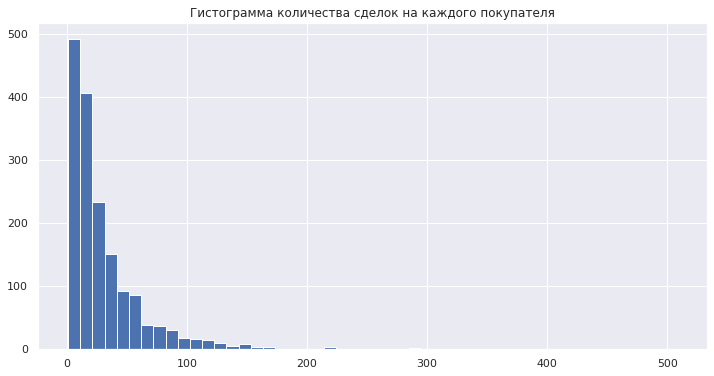

In [59]:
plt.hist(clients_val_cnt['deal_cnt'], bins=50)
plt.title('Гистограмма количества сделок на каждого покупателя');

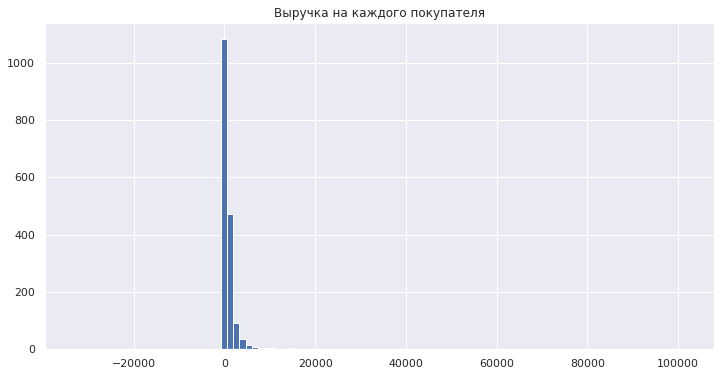

In [60]:
plt.hist(clients_val_revenue['revenue'], bins=100)
plt.title('Выручка на каждого покупателя');

На графике видны выбросы в сторону максимальных значений выручки. Для определния значений выбросов расчитаем 95-ый и 99-ый перцентили.

In [61]:
np.percentile(clients_val_cnt['deal_cnt'],[95,99])

array([ 97.  , 182.68])

На графике видны выбросы как в сторону минимальных, так и в сторону максимальных значений выручки. Для определния значений выбросов расчитаем 1-ый, 5-ый, 95-ый и 99-ый перцентили.

In [62]:
np.percentile(clients_val_revenue['revenue'],[1,5,95,99])

array([-1.04916600e+02,  8.45000000e+00,  3.47623600e+03,  1.50091144e+04])

Очистим данные по выручке от пяти процентов максимальных значений, то есть установим максимальную выручку от клиента в 3500 единиц. Данные по количеству очистим от одного процента максимамльных и минимальных значений. Посмотрим на распределение очищенных данных.

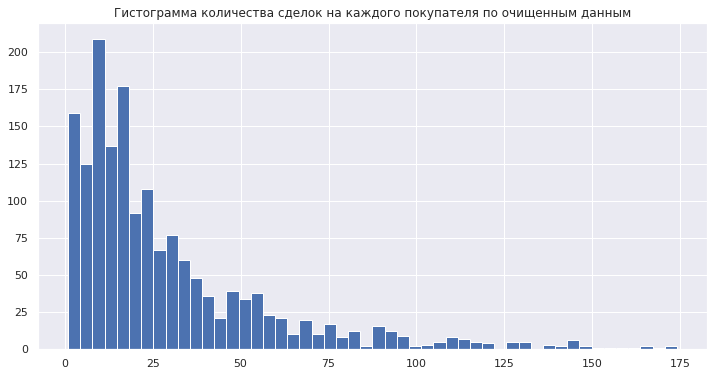

In [63]:
plt.hist(clients_val_cnt.query('deal_cnt < 180')['deal_cnt'], bins=50)
plt.title('Гистограмма количества сделок на каждого покупателя по очищенным данным');

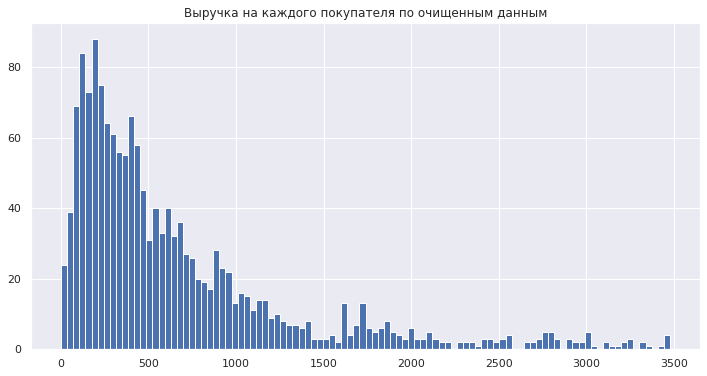

In [64]:
plt.hist(clients_val_revenue.query('0 < revenue < 3500')['revenue'], bins=100)
plt.title('Выручка на каждого покупателя по очищенным данным');

### <a name=210>2.10. Определение средней выручки от одного клиента. Определение средней выручки от одного клиента для каждой категории магазинов.</a>

Определим сумму выручки на одного уникального клиента за весь период.

In [65]:
revenue_per_client_common = data['revenue'].sum()/data['customer_id'].nunique()
revenue_per_client_common

1242.3609495123349

Посчитаем общую сумму, полученную от каждого уникального клиента за весь период по всем магазинам.

In [66]:
revenue_per_client = data.pivot_table(index=['customer_id'], values='revenue', aggfunc='sum')['revenue'].reset_index()

In [67]:
revenue_per_client.describe()

,customer_id,revenue
count,1743.000000,1743.000000
mean,20973.353987,1141.585668
std,1748.834791,3942.288140
min,18025.000000,-32922.105000
25%,19468.500000,202.722500
50%,20960.000000,441.515000
75%,22538.500000,934.240000
max,23962.000000,101301.125000


Составим список клиентов, потративших более 935 единиц.

In [68]:
vip_customers = revenue_per_client.query('revenue > 935')['customer_id']
len(vip_customers)

434

Посмотрим в каких магазинах обслуживались клиенты, потратившие более 935 единиц. 

In [69]:
data.query('customer_id in @vip_customers').groupby(by='shop_id')['customer_id'].nunique().sort_values(ascending=False).head(10)

shop_id
Shop 0     362
Shop 4      19
Shop 1      14
Shop 8       5
Shop 7       4
Shop 18      3
Shop 10      3
Shop 12      3
Shop 2       3
Shop 6       2
Name: customer_id, dtype: int64

Посчитаем среднюю выручку от уникального клиента для каждой категории торговых точек. В связи с наличием выбросов в значениях выручки от уникальных клиентов, в качестве среднего значения возьмем медианное.

In [70]:
revenue_per_client_1 = (data.query('shop_id == "Shop 0"')
                        .pivot_table(index=['customer_id'], values='revenue', aggfunc='sum')['revenue'].median())
revenue_per_client_1    

426.2825

In [71]:
revenue_per_client_2 = (data.query('shop_id in @shoplist_2')
                        .pivot_table(index=['customer_id'], values='revenue', aggfunc='sum')['revenue'].median())
revenue_per_client_2

774.6599999999999

In [72]:
revenue_per_client_3 = (data.query('shop_id in @shoplist_3')
                        .pivot_table(index=['customer_id'], values='revenue', aggfunc='sum')['revenue'].median())
revenue_per_client_3

672.6400000000001

Самая большая средняя выручка от одного клиента в магазинах категории 2, на втором месте - магазины категории 3, на третьем - магазины категории 1.

### <a name=211>2.11. Анализ активности клиентов, участвующих в программе лояльности.</a>

Посчитаем количество клиентов, присоединившихся и не присоеденившихся к программе лояльности.

In [73]:
data.groupby(by='loyalty_program')['purchase_id'].count()

loyalty_program
0.0    80617
1.0    23371
Name: purchase_id, dtype: int64

Плсмотрим как лояльные клиенты распределились по магазинам.

In [74]:
data.query('loyalty_program == 1').groupby(by='shop_id')['customer_id'].count()

shop_id
Shop 0     23230
Shop 19       48
Shop 28       30
Shop 8        63
Name: customer_id, dtype: int64

Практически все лояльные клиенты, 23230 из 23371, обслуживаются в магазине 'Shop 0'.

###  <a name=212>2.12. Определение средней выручки от клиентов, участвующих и не участвующих в программе лояльности. </a>

Расчитаем среднюю выручку для лояльных и нелояльных клиентов.

In [75]:
revenue_per_client_loyal = (data.query('loyalty_program == 1')
                           .pivot_table(index=['customer_id'], values='revenue', aggfunc='sum')['revenue'].reset_index())
revenue_per_client_loyal['revenue'].median()

426.82

In [76]:
revenue_per_client_unloyal = (data.query('loyalty_program == 0')
                             .pivot_table(index=['customer_id'], values='revenue', aggfunc='sum')['revenue'].reset_index())
revenue_per_client_unloyal['revenue'].median()

448.96750000000003

Средняя выручка от лояльных клиентов ниже, чем выручка от клиентов, не участвующих в программе лояльности. Возможно программа лояльности не так хороша.

Добавим к выручке с каждого лояльного клиента ежемесячную плату в 200 единиц за участие в программе лояльности. Так как в анализируемый период входит 2 месяца, добавим к выручке каждого лояльного клиента по 400 единиц.

In [77]:
revenue_per_client_loyal['revenue_payment'] = revenue_per_client_loyal['revenue'] + 400
revenue_per_client_loyal['revenue_payment'].median()

826.8199999999999

Средняя выручка с лояльного клиента с учетом ежемесячной платы за участие в программе лояльности превышает среднюю выручку с нелояльного клиента. Программа лояльности хорошо служит интересам торговой сети.

### <a name=213>2.13. Анализ количества проданного товара по каждой товарной позиции. Анализ количества возвращенного товара.</a> 

Расчитаем количество единиц проданного товара для каждой позиции. Определим 5 товаров с наибольшим количеством проданных единиц.

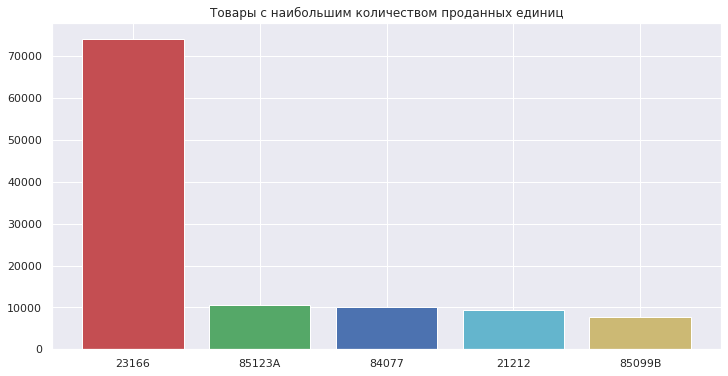

In [78]:
item_cnt = data.query('quantity > 0').groupby(by ='item_id')['quantity'].sum().sort_values(ascending=False).reset_index()
item_cnt.columns = ['item_id','quantity_sum']
plt.bar(item_cnt['item_id'].head(), item_cnt['quantity_sum'].head(), color=['r','g','b','c','y'])
plt.title('Товары с наибольшим количеством проданных единиц');

Посмотрим на распределение количества единиц проданного товара.

In [79]:
item_cnt.describe()

,quantity_sum
count,2774.000000
mean,339.401586
std,1565.297836
min,1.000000
25%,17.000000
50%,84.000000
75%,298.000000
max,74214.000000


Расчитаем количество продаж для каждого товара.

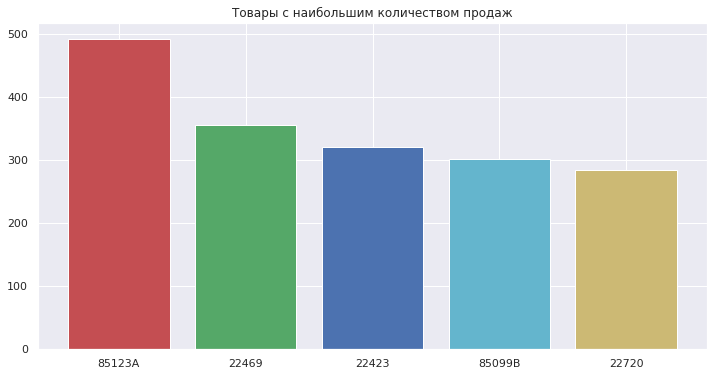

In [80]:
item_deals_cnt = (data.query('quantity > 0')
                  .groupby(by ='item_id')['quantity'].count().sort_values(ascending=False).reset_index())
item_deals_cnt.columns = ['item_id','quantity_cnt']
plt.bar(item_deals_cnt['item_id'].head(), item_deals_cnt['quantity_cnt'].head(), color=['r','g','b','c','y'])
plt.title('Товары с наибольшим количеством продаж');

Посмотрим на распределение количества продаж для каждого товара.

In [81]:
item_deals_cnt.describe()

,quantity_cnt
count,2774.000000
mean,25.172314
std,35.658565
min,1.000000
25%,4.000000
50%,13.000000
75%,32.000000
max,492.000000


В столбце quantity имеются отрицательные значения. Судя по характеру анализируемых данных, отрицательные значения quantity - это возвраты товара клиентами. Расчитаем количество единиц возвращенного товара для каждой позиции. Определим 5 товаров с наибольшим количеством возвращенных единиц.

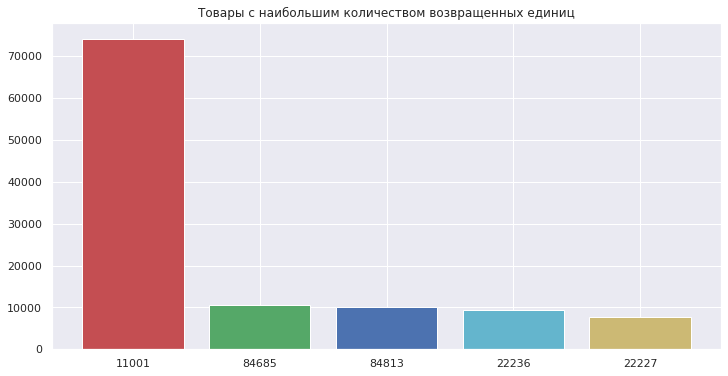

In [82]:
item_cnt_ret = data.query('quantity < 0').groupby(by ='item_id')['quantity'].sum().sort_values(ascending=False).reset_index()
item_cnt_ret.columns = ['item_id','quantity_sum']
plt.bar(item_cnt_ret['item_id'].head(), item_cnt['quantity_sum'].head(), color=['r','g','b','c','y'])
plt.title('Товары с наибольшим количеством возвращенных единиц');

Посмотрим на распределение количества возвращенного товара.

In [83]:
item_cnt_ret.describe()

,quantity_sum
count,944.000000
mean,-126.253178
std,2436.598171
min,-74216.000000
25%,-27.000000
50%,-12.000000
75%,-4.000000
max,-2.000000


Расчитаем количество возвратов для каждого товара.

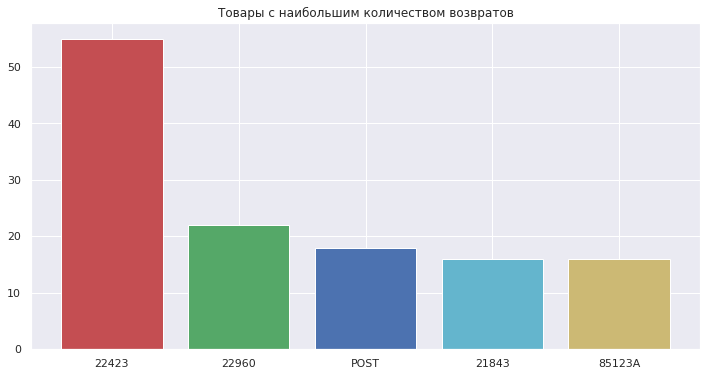

In [84]:
item_returns_cnt = (data.query('quantity < 0')
                  .groupby(by ='item_id')['quantity'].count().sort_values(ascending=False).reset_index())
item_returns_cnt.columns = ['item_id','quantity_cnt']
plt.bar(item_returns_cnt['item_id'].head(), item_returns_cnt['quantity_cnt'].head(), color=['r','g','b','c','y'])
plt.title('Товары с наибольшим количеством возвратов');

Посмотрим на распределение количества возвратов для каждого товара.

In [85]:
item_returns_cnt.describe()

,quantity_cnt
count,944.000000
mean,2.133475
std,2.789767
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,55.000000


### <a name=214>2.14. Анализ количества возвратов товара по категориям магазинов.</a>

В столбце quantity имеются отрицательные значения. Судя по характеру анализируемых данных, отрицательные значения quantity - это возвраты товара клиентами. Расчитаем количество возвратов для каждого магазина.

In [86]:
data.query('quantity < 0').groupby(by='shop_id')['quantity'].count().sort_values(ascending=False)

shop_id
Shop 0     1731
Shop 4      154
Shop 6       53
Shop 1       27
Shop 12       8
Shop 10       8
Shop 11       7
Shop 8        5
Shop 2        5
Shop 14       4
Shop 7        2
Shop 19       2
Shop 16       2
Shop 21       2
Shop 3        2
Shop 20       1
Shop 23       1
Name: quantity, dtype: int64

Расчитаем долю возвратов для каждой категории магазинов.

In [87]:
return_1 = (data.query('quantity < 0 & shop_id == "Shop 0"')['quantity'].count() 
            / data.query('shop_id == "Shop 0"')['quantity'].count())
return_1

0.018019237175216522

In [88]:
return_2 = (data.query('quantity < 0 & shop_id in @shoplist_2')['quantity'].count() 
            / data.query('shop_id in @shoplist_2')['quantity'].count())
return_2

0.054304943142260385

In [89]:
return_3 = (data.query('quantity < 0 & shop_id in @shoplist_3')['quantity'].count() 
            / data.query('shop_id in @shoplist_3')['quantity'].count())
return_3

0.01355463347164592

Самая большая доля возвращенных товаров (5%) в магазинах категории 2, реже всего возвращают товар в магазинах категории 3. 

## <a name=3>3. Проверка статистических гипотез.</a>

### <a name=31>3.1. Проверка гипотезы о равенстве ежедневного среднего чека для каждой категории магазинов.</a>

Построим совместный график распределния значений среднего чека для трех категорий магазинов.

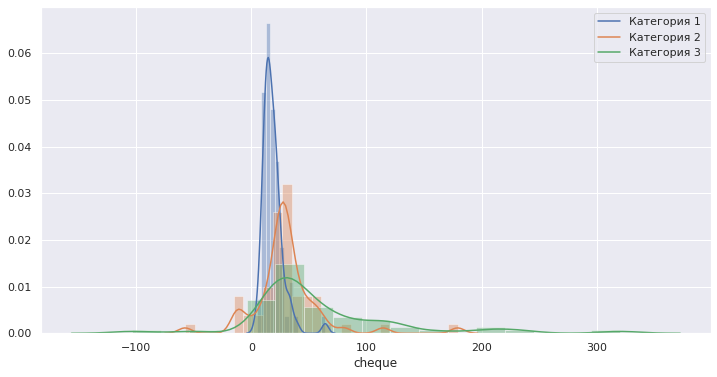

In [90]:
ax = sns.distplot(cat_1['cheque'],kde_kws={'label':'Категория 1'})
sns.distplot(cat_2['cheque'],kde_kws={'label':'Категория 2'},ax=ax)
sns.distplot(cat_3['cheque'],kde_kws={'label':'Категория 3'},ax=ax);

Установим уровень значимости alpha равный 0,05. Рассчитаем p-значение для трех пар категорий магазинов с использованием t-теста. Применим метод корректировки уровня значимости - метод Бонферрони. Разделим уровень значимости на количество гипотез: 3. Уровень значимости alpha с учетом поправки: 0,05 /3 = 0,017.

Сформулируем нулевую гипотезу: ежедневные средние чеки для магазинов категорий 1 и 2 равны. 

In [91]:
results_12 = st.ttest_ind(cat_1['cheque'],cat_2['cheque'])

In [92]:
results_12.pvalue

0.002752728639572112

Так как p-value меньше установленного критерия значимости в 0,017, делаем вывод, что нулевую гипотезу о равенстве долей возврата в магазинах категорий 1 и 2 можно отвергнуть. Между средним чеком в магазинах категорий 1 и 2 есть статистически значимые различия.

Сформулируем нулевую гипотезу: ежедневные средние чеки для магазинов категорий 1 и 3 равны. 

In [93]:
results_13 = st.ttest_ind(cat_1['cheque'],cat_3['cheque'])

In [94]:
results_13.pvalue

1.87623598895358e-06

Так как p-value меньше установленного критерия значимости в 0,017, делаем вывод, что нулевую гипотезу о равенстве средних чеков в магазинах категорий 1 и 3 можно отвергнуть. Между средними чеками в магазинах категорий 1 и 3 есть статистически значимые различия.

Сформулируем нулевую гипотезу: ежедневные средние чеки для магазинов категорий 2 и 3 равны. 

In [95]:
results_23 = st.ttest_ind(cat_2['cheque'],cat_3['cheque'])

In [96]:
results_23.pvalue

0.003354404277860701

Так как p-value меньше установленного критерия значимости в 0,017, делаем вывод, что нулевую гипотезу о равенстве средних чеков в магазинах категорий 2 и 3 можно отвергнуть. Между средними чеками в магазинах категорий 2 и 3 есть статистически значимые различия.

### <a name=32>3.2. Проверка гипотезы о равенстве средней выручки, без учета платы за участие в программе лояльности, от клиентов, участвующих и не участвующих в программе лояльности.</a>

Построим график распределения значений выручки от каждого клиента.

In [97]:
revenue_all = (data.pivot_table(index=['customer_id'], values='revenue', aggfunc='sum'))

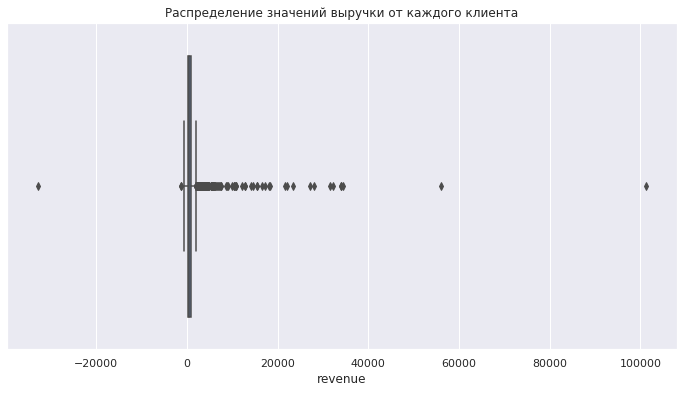

In [98]:
sns.boxplot(revenue_all['revenue'])
plt.title('Распределение значений выручки от каждого клиента');

На графике видны выбросы как в сторону минимальных, так и в сторону максимальных значений выручки. Для определния значений выбросов расчитаем 1-ый, 5-ый, 95-ый и 99-ый перцентили.

In [99]:
np.percentile(revenue_all['revenue'],[1,5,95,99])

array([-1.04916600e+02,  8.45000000e+00,  3.47623600e+03,  1.50091144e+04])

Отбросим первые и последние пять процентов значений. Отфильтруем значения выручки для лояльных и нелояльных клиентов.

In [100]:
revenue_loyal = (data.pivot_table(index=['customer_id','loyalty_program'], values='revenue', aggfunc='sum')
                   .query('loyalty_program == 1 & 9 < revenue & revenue < 3500'))

In [101]:
revenue_unloyal = (data.pivot_table(index=['customer_id','loyalty_program'], values='revenue', aggfunc='sum')
                   .query('loyalty_program == 0 & 9 < revenue & revenue < 3500'))

Построим совместный график распределния значений выручки для лояльных и нелояльных клиентов.

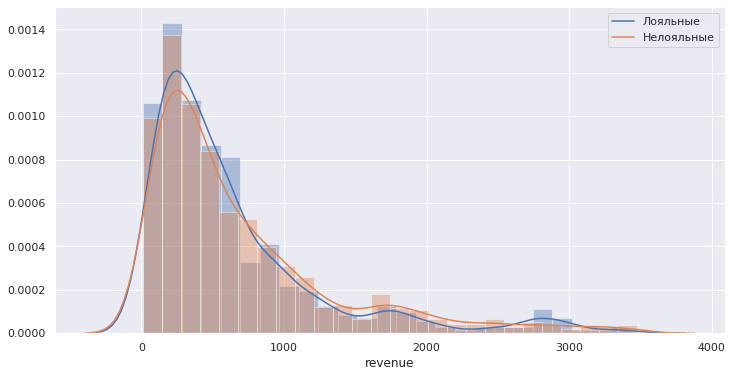

In [102]:
ax = sns.distplot(revenue_loyal['revenue'],kde_kws={'label':'Лояльные'})
sns.distplot(revenue_unloyal['revenue'],kde_kws={'label':'Нелояльные'},ax=ax);

Ранне в ходе анализа было установлено, что без учета ежемесячной платы за участие в программе лояльности, средняя выручка от лояльного клиента ниже, чем от нелояльного. Проверим гипотезы о равенстве средней выручки с учетом и без учета платы за участие в программе лояльности.

Сформулируем нулевую гипотезу: средняя выручка от лояльных клиентов, без учета ежемесячной платы за участие в программе лояльности, равна средней выручке от клиентов, не участвующих в программе. Установим уровень значимости alpha равный 0,05.

In [103]:
results_loyal = st.ttest_ind(revenue_loyal['revenue'],revenue_unloyal['revenue'])

In [104]:
results_loyal.pvalue

0.1113414176194429

Так как p-value больше установленного критерия значимости в 0,05, делаем вывод, что нулевую гипотезу о равенстве средней выручки от клиентов, участвующих в программе лояльности, средней выручке от клиентов, не участвующих в программе, отвергнуть нельзя. Между средней выручкой от лояльных клиентов и средней выручкой от клиентов, не участвующих в программе лояльности, отсутствуют статистически значимые различия.

Сформулируем нулевую гипотезу: средняя выручка от лояльных клиентов, c учетом ежемесячной платы за участие в программе лояльности, равна средней выручке от клиентов, не участвующих в программе. Установим уровень значимости alpha равный 0,05.

In [113]:
revenue_loyal['revenue_payment'] = revenue_loyal['revenue'] + 400

In [116]:
results_loyal_payment = st.ttest_ind(revenue_loyal['revenue_payment'],revenue_unloyal['revenue'])

In [117]:
results_loyal_payment.pvalue

2.116987752412563e-21

Так как p-value меньше установленного критерия значимости в 0,05, делаем вывод, что нулевую гипотезу о равенстве средней выручки от лояльных клиентов, с учетом ежемесячной платы, средней выручке от нелояльных клиентов можно отвергнуть. Между средней выручкой,  от лояльных клиентов и средней выручкой от клиентов, не участвующих в программе лояльности, имеются статистически значимые различия. Средняя выручка от лояльных клиентов с учетом платы за участие в программе лояльности выше средней выручки от нелояльных клиентов.

### <a name=33>3.3. Проверка гипотезы о равенстве долей возврата товара для каждой категории категории магазинов.</a>

In [105]:
return_cat1 = data.query('quantity < 0 & shop_id == "Shop 0"')['quantity'].count() 
total_cat1 = data.query('shop_id == "Shop 0"')['quantity'].count()

In [106]:
return_cat2 = data.query('quantity < 0 & shop_id in @shoplist_2')['quantity'].count() 
total_cat2 = data.query('shop_id in @shoplist_2')['quantity'].count()

In [107]:
return_cat3 = data.query('quantity < 0 & shop_id in @shoplist_3')['quantity'].count() 
total_cat3 = data.query('shop_id in @shoplist_3')['quantity'].count()

Для расчета p_value используем функцию, которой передадим в качестве аргументов данные о количестве возвратов для сравниваемых категорий и данные об общем количестве продаж для каждой категории. 

In [108]:
def pvalue_culc(return_1, return_2, total_1, total_2):
    distr = st.norm(0, 1) 
    p1 = return_1/total_1
    p2 = return_2/total_2
    p_combined = (return_1 + return_2) / (total_1 + total_2)
    difference = p1 - p2
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/total_1 + 1/total_2))
    p_value = (1 - distr.cdf(abs(z_value))) * 2
    return p_value

Сформулируем нулевую гипотезу: доля возвратов товара в магазинах категории 1 равна доле возвратов в магазинах категории 2.
Установим уровень значимости alpha равный 0,05. Применим метод корректировки уровня значимости - метод Бонферрони. Разделим уровень значимости на количество гипотез: 3. Уровень значимости alpha с учетом поправки: 0,05 /3 = 0,017.

In [109]:
p_value_12 = pvalue_culc(return_cat1,return_cat2,total_cat1,total_cat2)
p_value_12

0.0

Так как p-value меньше установленного критерия значимости в 0,017, делаем вывод, что нулевую гипотезу о равенстве долей возврата в магазинах категорий 1 и 2 можно отвергнуть. Между долями возврата в магазинах рассматриваемых категорий есть статистически значимые различия.

Сформулируем нулевую гипотезу: доля возвратов товара в магазинах категории 1 равна доле возвратов в магазинах категории 3.
Установим уровень значимости alpha равный 0,05. Применим метод корректировки уровня значимости - метод Бонферрони. Разделим уровень значимости на количество гипотез: 3. Уровень значимости alpha с учетом поправки: 0,05 /3 = 0,017.

In [110]:
p_value_13 = pvalue_culc(return_cat1,return_cat3,total_cat1,total_cat3)
p_value_13

0.04660757931594928

Так как p-value больше установленного критерия значимости в 0,017, делаем вывод, что нулевую гипотезу о равенстве долей возврата в магазинах категорий 1 и 3 отвергнуть нельзя.

Сформулируем нулевую гипотезу: доля возвратов товара в магазинах категории 2 равна доле возвратов в магазинах категории 3.
Установим уровень значимости alpha равный 0,05. Применим метод корректировки уровня значимости - метод Бонферрони. Разделим уровень значимости на количество гипотез: 3. Уровень значимости alpha с учетом поправки: 0,05 /3 = 0,017.

In [111]:
p_value_23 = pvalue_culc(return_cat2,return_cat3,total_cat2,total_cat3)
p_value_23

0.0

Так как p-value меньше установленного критерия значимости в 0,017, делаем вывод, что нулевую гипотезу о равенстве долей возврата в магазинах категорий 2 и 3 можно отвергнуть. Между долями возврата в магазинах рассматриваемых категорий есть статистически значимые различия.

## <a name=4> 4. Выводы.</a>

По результатам данных о продажах сети магазинов строительных материалов можно сделать следующие выводы.     

Рассматриваемая сеть состоит из 31 торговой точки. Магазин 'Shop 0' является безоговорочным лидером по количеству продаж и выручке, его результаты на порядок выше, чем у ближайших преследователей. Судя по огромному разрыву в общей выручке и количеству сделок между магазином 'Shop 0' и другими точками, 'Shop 0' является интернет-магазином или гипермаркетом, значительно опережающим по ресурсам остальные точки. Среди остальных магазинов явные лидеры по количеству продаж и выручке - магазины 'Shop 1', 'Shop 4' и 'Shop 6'.      
В целях анализа эффективности торговых точек, магазины были разделены на три категории исходя из общего количества сделок.  В категорию 1 был помещен магазин 'Shop 0'. Ко второй категории отнесены лидеров оставшейся части магазинов - 'Shop 1', 'Shop 4' и 'Shop 6' (суммарное количество сделок магазинов второй категории - 3615). К третьей категории отнесены все остальные торговые точки (суммарное количество сделок магазинов третьей категории - 4309).    
Количество продаж магазинов категории 1 на каждую дату анализируемого периода значительно превышает количество продаж магазинов категорий 2 и 3. Выручка на каждую дату анализируемого периода магазинов категории 1 в целом выше, чем у магазинов категорий 2 и 3, однако, в середине января и февраля наблюдаются периоды, когда выручка магазинов всех 3 категорий находится на одном уровне. Лидером по величине среднего чека являются магазины категории 3.     
Подавляющее большинство покупателей обслуживаются в магазине 'Shop 0'.     
Самая большая средняя выручка от одного клиента в магазинах категории 2, на втором месте - магазины категории 3, на третьем - магазины категории 1.
Практически все клиенты, участвующие в программе лояльности - 23230 из 23371, обслуживаются в магазине 'Shop 0'. Средняя выручка от лояльных клиентов ниже, чем выручка от клиентов, не участвующих в программе лояльности.     
В столбце quantity имеются отрицательные значения. Судя по характеру анализируемых данных, отрицательные значения quantity - это возвраты товара клиентами.     
Самая большая доля возвращенных товаров (5%) в магазинах категории 2, реже всего возвращают товар в магазинах категории 3.     

В ходе анализа были проверены следующие статистические гипотезы:
- гипотеза о равенстве ежедневного среднего чека для каждой категории магазинов;
- гипотеза о равенстве средней выручки от клиентов, участвующих и не участвующих в программе лояльности, без учета платы за участие в программе лояльности;
- гипотеза о равенстве средней выручки от клиентов, участвующих и не участвующих в программе лояльности, с учетом платы за участие в программе лояльности;
- гипотеза о равенстве долей возврата товара для каждой категории категории магазинов.
При проверке гипотезы о равенстве ежедневного среднего чека были установлены статистически значимые различия для всех пар сраниваемых выборок. Нулевая гипотеза была отвергнута в трех случаях. Результаты исследовательского анализа были подтверждены. 
При проверке гипотезы о равенстве средней выручки от клиентов, участвующих и не участвующих в программе лояльности, было установлено, что между средней выручкой от лояльных клиентов, без учета ежемесячной платы, и средней выручкой от клиентов, не участвующих в программе лояльности, отсутствуют статистически значимые различия. Проверка равенства средней выручки от лояльных и нелояльных клиентов с учетом платы за участие в программе лояльности, показала наличие статистически значимых различий между средними значениями выручки от лояльных и нелояльных клиентов.
При проверке гипотезы о равенстве долей возврата товара для каждой категории категории магазинов, нулева гипотеза была отвергнута для пар 2-3 и 1-2. 

## <a name=5>5. Презентация результатов анализа.</a>

[Презентация "Ритейл — Оценка эффективности торговых точек"](https://yadi.sk/i/aSA6RT1Ibwm8lg)

## <a name=6>6. Создание дашборда в Tableau. Размещение дашборда на сайте Tableau Public.</a>

[Дашборд на сайте Tableau Public](https://public.tableau.com/profile/andrey.larionov#!/vizhome/diplom_16049470348080/Dashboard1?publish=yes)